In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
fraud_data.shape

(600, 6)

In [5]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
#Checking null values
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


No null values

In [8]:
fraud_data[fraud_data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


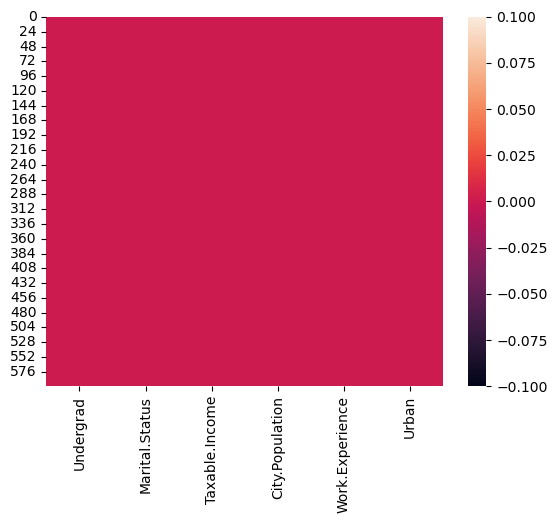

In [9]:
sns.heatmap(fraud_data.isnull())
plt.show()

Outlier Detection for the following data:-

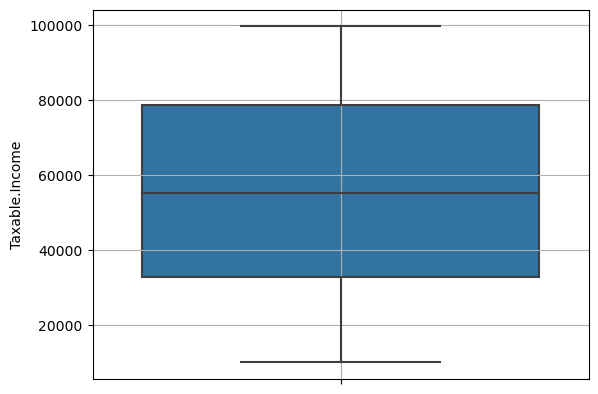

In [10]:
sns.boxplot(y="Taxable.Income",data=fraud_data)
plt.grid()
plt.show()


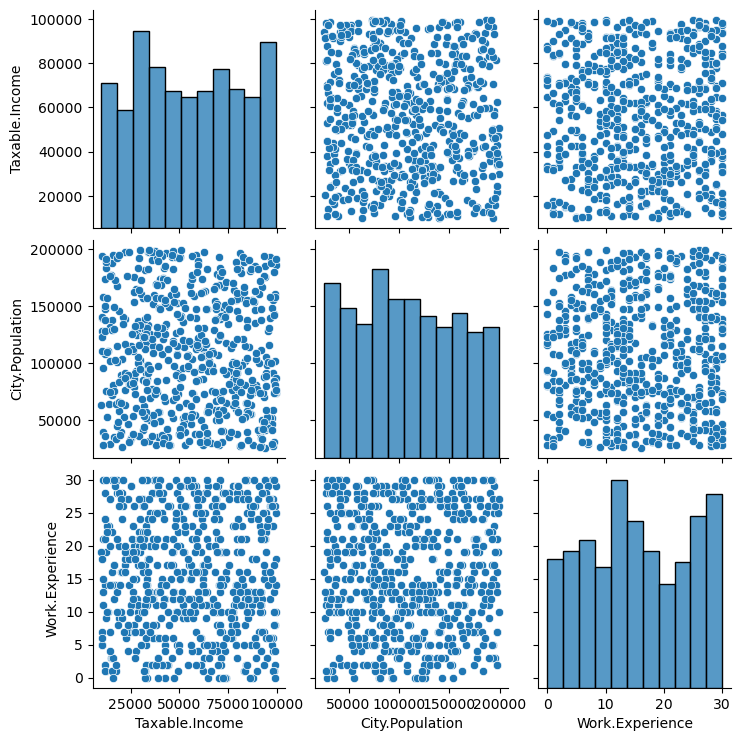

In [12]:
sns.pairplot(fraud_data)
plt.show()

Exploration Data Visualization (Exploratory Data Analysis):-

Correlation Matrix:-

In [13]:
fraud_data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


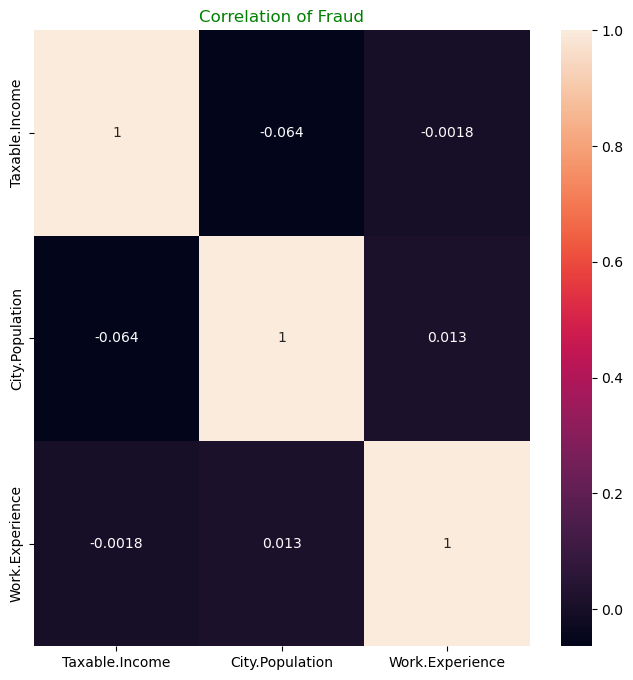

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(fraud_data.corr(),annot=True)
plt.title("Correlation of Fraud", color = 'green')
plt.show()

In [15]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [16]:
fraud_data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


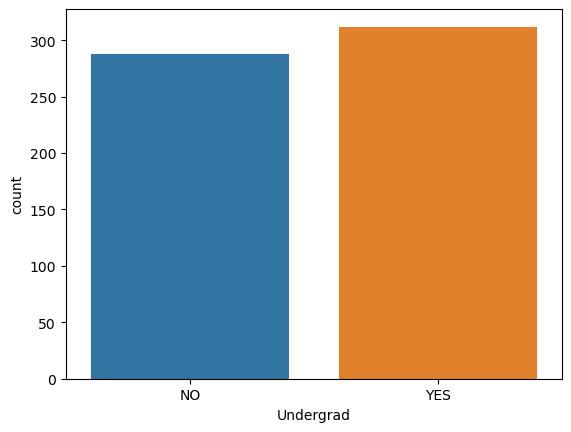

In [17]:
sns.countplot("Undergrad",data=fraud_data)
plt.show()

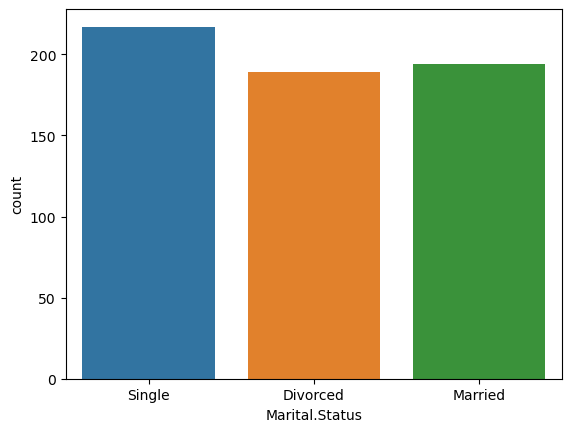

In [18]:
sns.countplot("Marital.Status",data=fraud_data)
plt.show()

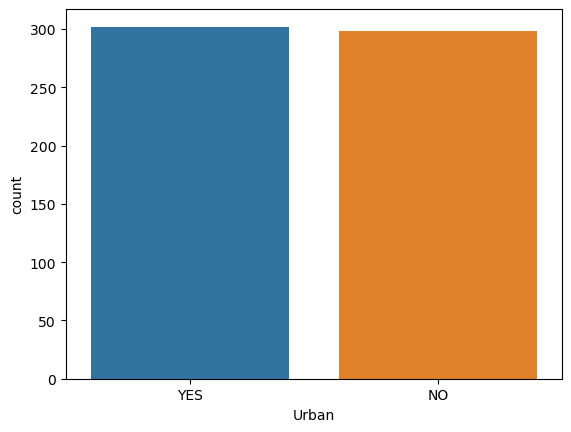

In [19]:
sns.countplot("Urban",data=fraud_data)
plt.show()

In [20]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [21]:
label_encoder= preprocessing.LabelEncoder()
fraud_data['Undergrad']=label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status']=label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']=label_encoder.fit_transform(fraud_data['Urban'])

In [22]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [23]:
fraud_data.rename(columns={"Marital.Status":"marital_status",
                           "Taxable.Income":"tax_in",
                           "City.Population":"city_popu",
                           "Work_Experience":"work_exp"},inplace=True)

In [24]:
fraud_data["status"]=fraud_data["tax_in"].apply(lambda tax_in:"Risky" if tax_in <=30000 else "Good")

In [25]:
fraud_data.head(10)

,Undergrad,marital_status,tax_in,city_popu,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [26]:
fraud_data.drop(["tax_in"],axis=1,inplace=True)

In [27]:
fraud_data["status"]=label_encoder.fit_transform(fraud_data["status"])

In [28]:
x=fraud_data.iloc[:,0:5]
y=fraud_data.iloc[:,-1]
x

,Undergrad,marital_status,city_popu,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

Spliting Data into Training and Testing Dataset:-

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 5) (120, 5) (480,) (120,)


Model Creation:-

In [32]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Model Validation:- Confusion Matrix

Training and Testing Accuracy:-

In [33]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[72, 20],
       [21,  7]], dtype=int64)

In [35]:
test_acc=accuracy_score(y_test,y_pred)
test_acc

0.6583333333333333

In [36]:
y_pred1=model.predict(x_train)
train_acc=accuracy_score(y_train,y_pred1)
train_acc

1.0

Mapping/ Plotting the Tree:-

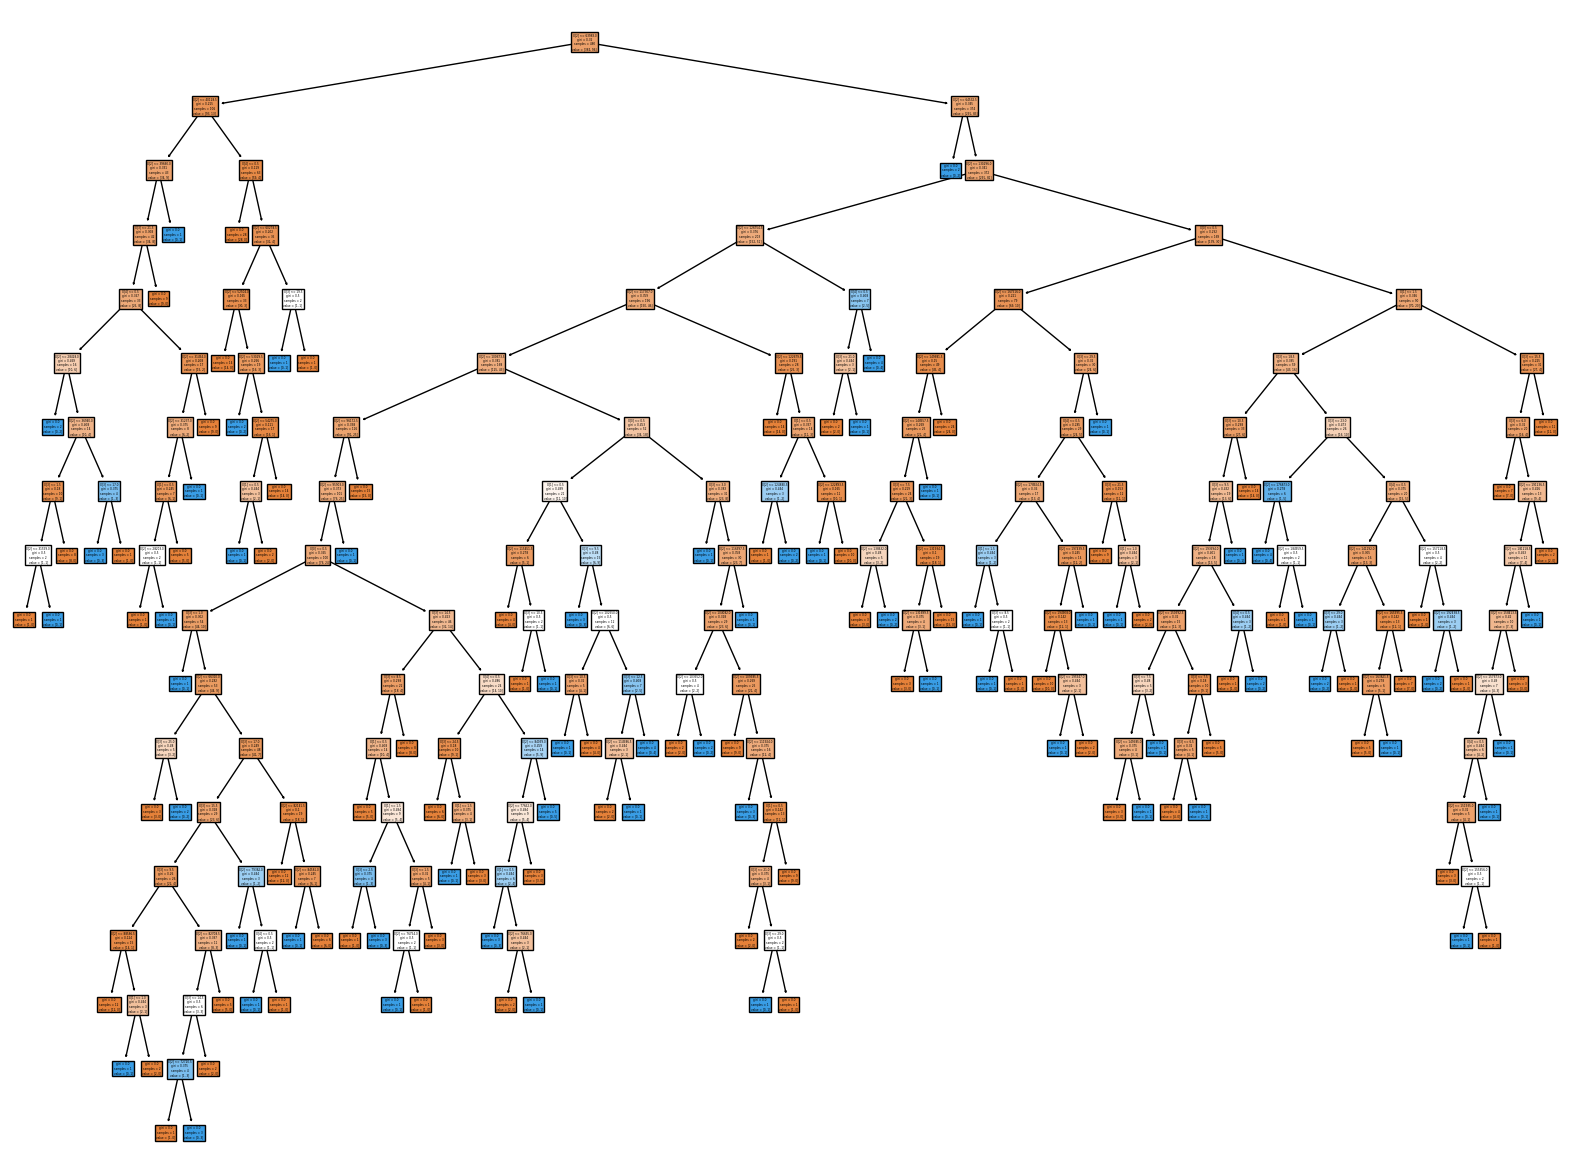

In [37]:
plt.figure(figsize=(20,15))
tree.plot_tree(model,filled=True)
plt.show()

K-Fold Testing:-

In [38]:
fold=KFold(n_splits=5,shuffle=False)
model1=DecisionTreeClassifier()

In [39]:
results=cross_val_score(model1,x,y,cv=fold)
results

array([0.68333333, 0.63333333, 0.61666667, 0.61666667, 0.68333333])

In [40]:
results.min(),results.max()

(0.6166666666666667, 0.6833333333333333)

In [41]:
results.std()

0.03055050463303893

In [42]:
results.mean()

0.6466666666666667

Final Model Creation:-

In [43]:
final_model = DecisionTreeClassifier(criterion="entropy",max_depth=3)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

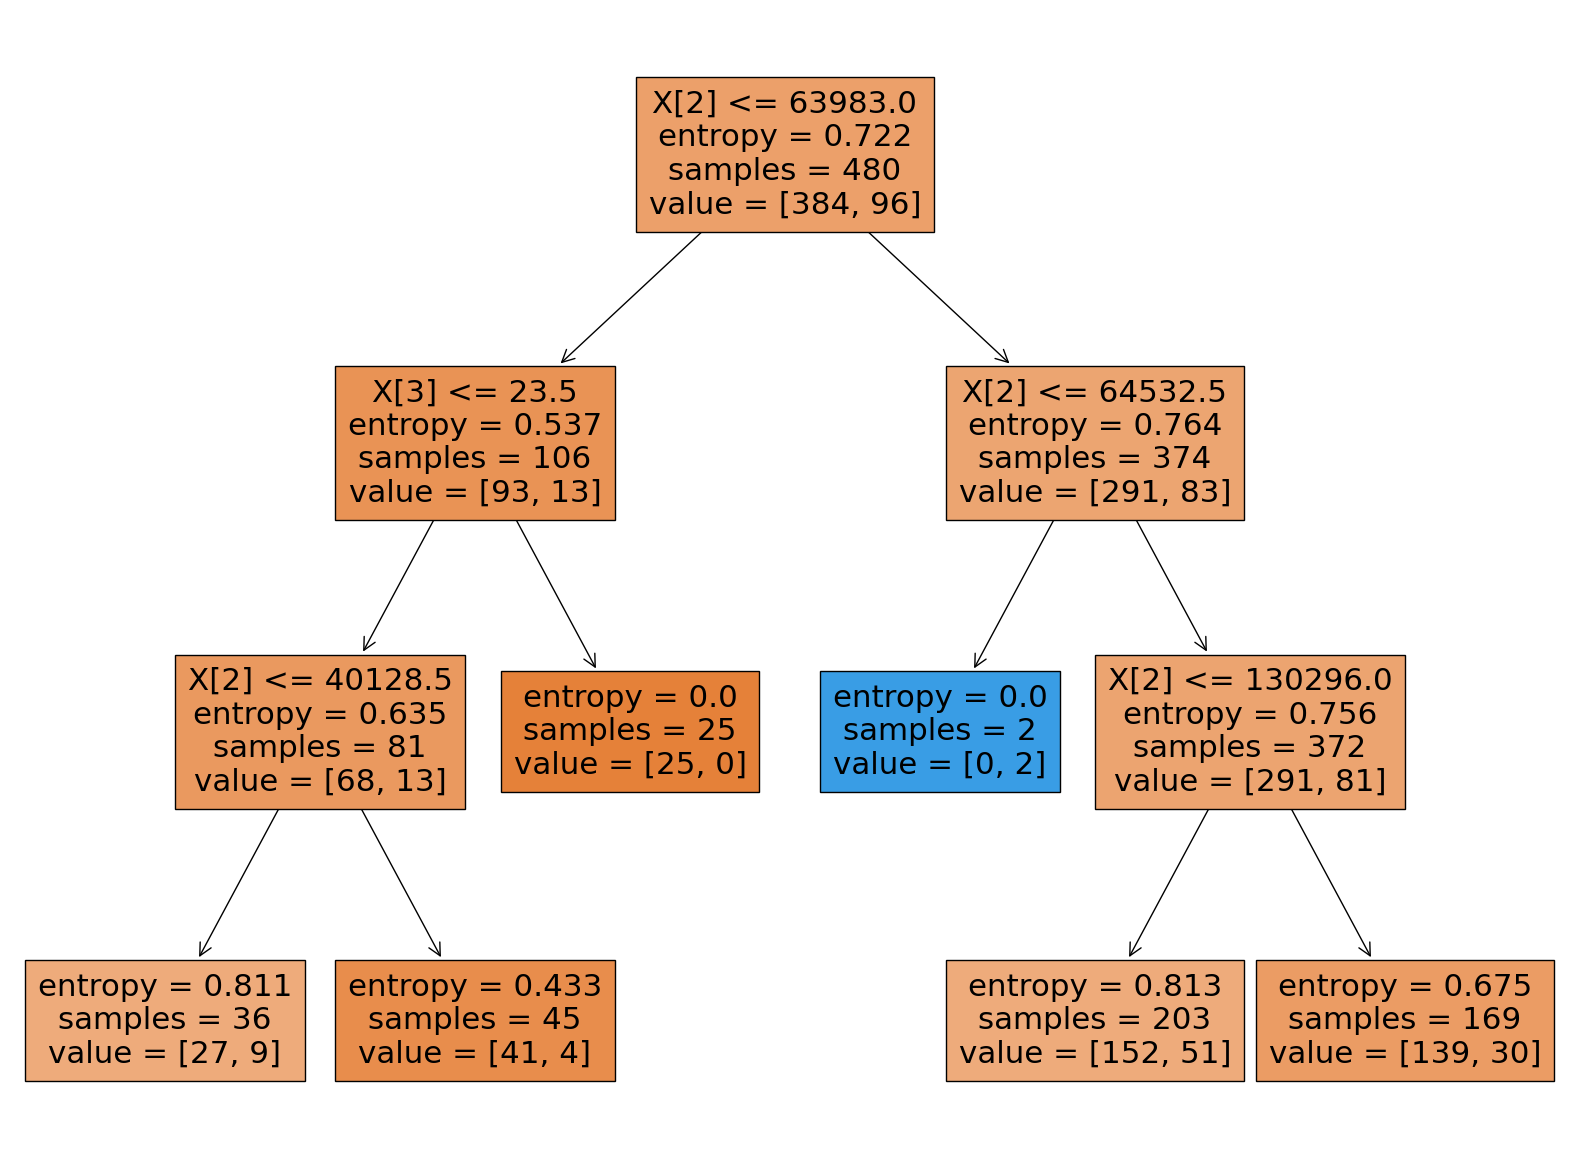

In [44]:
plt.figure(figsize=(20,15))
tree.plot_tree(final_model,filled=True)
plt.show()

In [45]:
preds=final_model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [47]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
pd.crosstab(y_test,preds)

col_0,0
status,
0,92
1,28


In [49]:
final_model.score(x_test,y_test)

0.7666666666666667